In [8]:
from IPython.core.display import HTML
def css_styling():
    styles = open("../styles/custom.css", "r").read()
    return HTML(styles)
css_styling()

<IMG SRC="images/PhysicsLogo.jpg" WIDTH=100 ALIGN="right">

# [Physics 411](http://jklymak.github.io/Phy411/) Time Series Analysis
*Jody Klymak*


# Lecture 0: Introduction and Computing

  - [What is Timeseries Analysis?](#What-is-Time-Series-Analysis)
  - [Computing in this course](#Computing-in-this-course)
  - [Introduction to Python](#Introduction-to-Python)

## What is Time Series Analysis?

Time series analysis is the art of extracting quantifiable information from data that is correlated in time.  It is differentiated from [univariate statistics](http://en.wikipedia.org/wiki/Univariate_analysis), which deals with data that are uncorrealted in time, i.e. the order in which they are collected does not matter.  

A simple example of a univariate data set would be the weights of a population of people.  These weights could be presented in any order, and it would not change the character of the data.

Conversely, the weight of a given individual over time is an example of a [time series](http://en.wikipedia.org/wiki/Time_series).  The data has a natural, chronological order.  Furthermore, you might expect that data to be more self-correlated from measurement to measurement because given individual body weight do not tend to change that rapidly.  

### Illustrative Examples

Lets consider two time series, and plot them in time.  These data sets are fake, in that I make them synthetically.  Details are in [Notes00.ipynb](http://nbviewer.ipython.org/github/jklymak/Phy411/blob/master/lectures/Notes00.ipynb).  

<IPython.core.display.Javascript object>


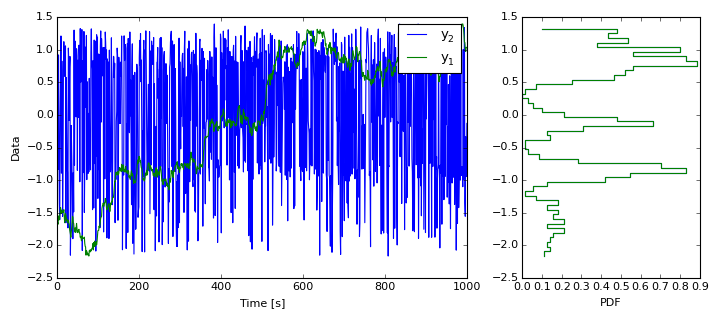

In [10]:
# load the time series from the web:
import numpy as np
import urllib
# include the following at the top of all your notebooks
%matplotlib nbagg
# Its possible, this does not work

f=urllib.urlopen("https://github.com/jklymak/Phy411/raw/master/lectures/resources/Lesson00/FakeData.txt")
dat=np.loadtxt(f)
time = dat[0,:]
y1 = dat[1,:]
y2 = dat[2,:]
# plot the data

# Load the plotting libraries
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec


plt.figure(figsize=(9,4))        # Make figure
gs=gridspec.GridSpec(1,3)        # Set up the layout
ax1=plt.subplot(gs[0:2])         # select the first two grid cells on the left to plot in
ax1.plot(time,y2,label='$y_2$')  # plot
ax1.plot(time,y1,label='$y_1$')  # plot
ax1.set_xlabel('Time [s]'),ax1.set_ylabel('Data'),ax1.legend()   # label

ax2=plt.subplot(gs[2])           # selct the third gridcell
n1,edges1=np.histogram(y1,bins=50,density=True)    # get the histograms
n2,edges2=np.histogram(y2,bins=50,density=True)
ax2.step(n1,edges1[:-1],where='pre')               # plot
ax2.step(n2,edges2[:-1]),ax2.set_xlabel('PDF')     # plot and label

plt.tight_layout()               # tighten the layout a bit

Hopefully it is clear that these two timeseries are different in character.  Yet, if we simply look at the distribution of these two time series (the "[probabilty density function](http://en.wikipedia.org/wiki/Probability_density_function)"), they are exactly identical.  They will have the same mean and variance, and any higher order univatiare statistics we want to check:

In [11]:
import scipy.stats as stats

print('mean:     %6.3f %6.3f' % (y1.mean(),y2.mean()))
print('variance: %6.3f %6.3f' % (y1.var(),y2.var()))
print('skew:     %6.3f %6.3f' % (stats.skew(y1),stats.skew(y2)))


mean:     -0.000 -0.000
variance:  1.000  1.000
skew:     -0.442 -0.442


Of course, its perfectly acceptable to calculate these univariate statistics for these time series, but it doesn't help us describe what is *different* about them from one another.  Doing so is one of the goals of time series analysis.  To preview a couple of techniques, we might consider what the two series "[autocorrelation function](http://en.wikipedia.org/wiki/Autocorrelation)" looks.  The *autocorrelation function* is also called the "auto lag correlation" and indicates how correlated the function is with itself in time.  

**Q** In the above example, which time series do you expect has the greater autocorrelation at large lags?  

<IPython.core.display.Javascript object>


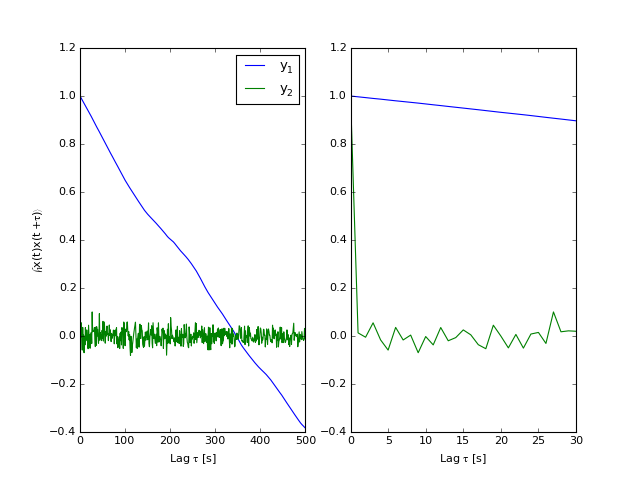

(0, 30)

In [12]:
# We will cheat and use the numpy function for this:
acor1 = np.correlate(y1,y1,'same')
acor1=acor1[len(acor1)/2:]
acor2 = np.correlate(y2,y2,'same')
acor2=acor2[len(acor2)/2:]

fig,ax=plt.subplots(1,2)        # make a figure with two subplots
N=len(y1)
ax[0].plot(acor1/y1.var()/N,label='$y_1$') # plot;  note the label for the legend
ax[0].plot(acor2/y2.var()/N,label='$y_2$') # plot;  the $y_1$ tells matplotlib to use LaTeX
ax[0].set_xlabel(r'Lag $\tau$ [s]')
ax[0].set_ylabel(r'$\left<x(t)x(t+\tau)\right>$')
ax[0].legend()

ax[1].plot(acor1/y1.var()/N)
ax[1].plot(acor2/y2.var()/N)
ax[1].set_xlabel(r'Lag $\tau$ [s]')
ax[1].set_xlim([0,30])

We will discuss *autocorrelation* functions in greater depth, but $y_2$ is not correlated at lags greater than zero.  Of course it has an autocorrelation of unity at lag $\tau=0$.  Conversely, $y_1$ is highly correlated at all lags.  This should be obvious from the time series plot above.  

Another powerful way to consider the time series that we will cover in detail is to produce a [power spectrum](http://en.wikipedia.org/wiki/Spectral_density) of the data.  The power spectrum represents the variance of the time series as a function of frequency.

**Q** Which of the two time series has more *low* frequency information?

<IPython.core.display.Javascript object>


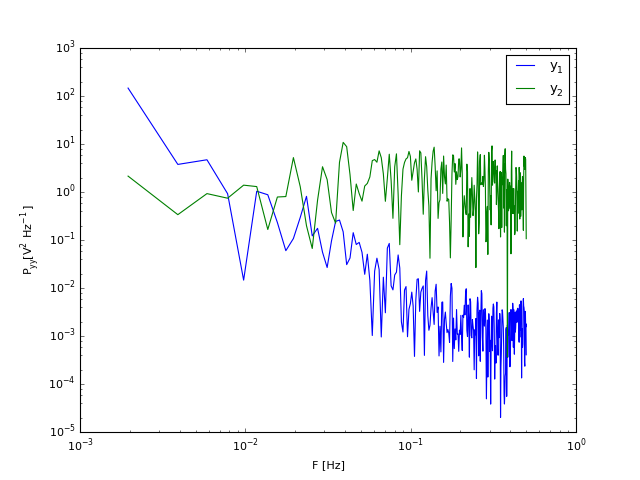

In [13]:
import matplotlib.mlab as mlab     # mlab has a canned function for power spectra...

pxx1,f=mlab.psd(y1,Fs=1.,NFFT=512) # compute power spectra
pxx2,f=mlab.psd(y2,Fs=1.,NFFT=512)
fig,ax=plt.subplots(1) 
ax.loglog(f,pxx1,label='$y_1$')
ax.loglog(f,pxx2,label='$y_2$')
ax.set_xlabel('F [Hz]')
ax.set_ylabel('$P_{yy} [V^2 Hz^{-1}]$')
ax.legend()

When transformed to frequency space like this, it is clear that $y_1$ has more low frequency variance than $y_2$, and vice-versa for the high frequencies.  This should be visible by eye from the time series, but it is useful to quantify the differences.  Power spectra are an extremely powerful technique of timeseries analysis, and will be covered extensively in this course.  

### More examples:

**Economic**: (from http://stat.duke.edu/~mw/data-sets/ts_data/industrial_production)

<IPython.core.display.Javascript object>


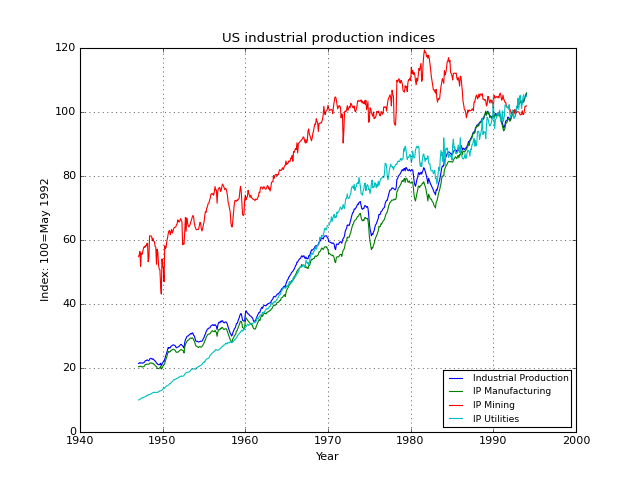

In [6]:
dat=np.loadtxt('resources/usindustrialprod.txt',skiprows=20)
fig,ax=plt.subplots(1)
ax.plot(dat[:,0]+dat[:,1]/12.+1900,dat[:,2],label='Industrial Production')
ax.plot(dat[:,0]+dat[:,1]/12.+1900,dat[:,3],label='IP Manufacturing')
ax.plot(dat[:,0]+dat[:,1]/12.+1900,dat[:,6],label='IP Mining')
ax.plot(dat[:,0]+dat[:,1]/12.+1900,dat[:,7],label='IP Utilities')
ax.set_ylabel('Index: 100=May 1992')
ax.set_xlabel('Year')
ax.set_title('US industrial production indices')
ax.grid()
hl=ax.legend(loc=4,fontsize='small')

**Astronomy**: http://smei.ucsd.edu/new_smei/data&images/stars/timeseries.html  (This time series obviously needs some cleaning up).

<IPython.core.display.Javascript object>


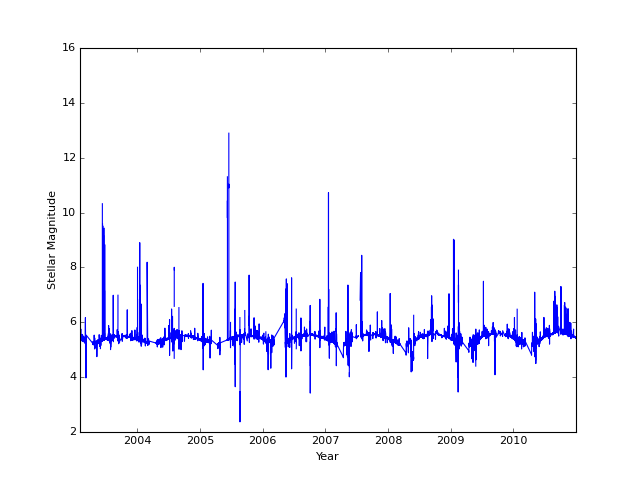

In [7]:
import dateutil.parser as dparser
import numpy as np

dat= np.genfromtxt('resources/stardata2.txt', dtype='object', delimiter=',',
                      converters = {0: dparser.parse})
fig,ax=plt.subplots(1)
ax.plot_date(dat[:,0],dat[:,1],'-')
ax.set_xlabel('Year')
ax.set_ylabel('Stellar Magnitude')


Of course there are an infinity of others...

## Computing in this course:

Refer to the [main course webpage](http://jklymak.github.io/Phy411/Computing/) for a discussion of setting up python on your computer or on the web.

## Introduction to Python

As I mention above, I recommend python for this course.  There is no requirement for you to use python if you are wedded to another programming language, but if not, python is likely the most straightforward.  There are a good number of introductions to scientific computing with python on the web:

  - [Exploratory computing with Python](http://mbakker7.github.io/exploratory_computing_with_python/) (Particulary lessons 1-4)
  - [Introduction to scientific computing with Python](http://nbviewer.ipython.org/github/jrjohansson/scientific-python-lectures/blob/master/Lecture-0-Scientific-Computing-with-Python.ipynb) (Lessons 0-4)
  
  $$ x = e^{-jy}$$

### Computing model

Python is an interpreted language, which means all operations can be carried out on a command line.  This is in contrast to a "compiled" langauge like C or Java, for which you edit a file, compile the program, and then run the program.  The advantage of an interpreted language is that you get immediate feedback on the results of your coding.  This is very powerful for exloring data where many iterations are sometimes necessary to get a "final" answer.  

There are two main disadvantages.  First, the code can be slower, particularly if you are not careful in your coding techniques.  This is often fixable by simply writing a C or Fortran module for the slow code, and calling it from python. Of course as computers get more powerful this is less of a problem, but unoptimized code can still be slow

The second disadvantage of an interpreted langauge is saving your work.  Since you can just type into the command line, your "final" work is ephemeral.  Of course you can save the "history" of your commands, but this is not always what you want.  There are two ways around this in python and other interpreted languages.  The first is to write "script" files, which are basically a sequence of commands as you would type them at the command line.  The second is to write a "[Notebook](http://ipython.org/Notebook/)" like the one I am writing here.  These can be relatively formal, like this notebook, or they can just be a cascade of commands and their results. The nice thing about the notebook model is that the commands and their results are in the same file, and therefore you have code that is very self-documenting.  A disadvantage is that the resulting file, while just text, is not very easy to read.  

### Notebooks

When you open a notebook there are different types of "cells" you can enter information in.  These are chosen in the dropdown menu:

<IMG SRC="images/CellDropDown.png" WIDTH=500 ALIGN="center">

The important types are `Code` and `Markdown`.  `Code` is as you would expect, cells that contain code.  You type code in as you would in a regular text editor.  To execute the code you hit "Shift-enter", and the result will appear below the cell. Examples are given above in the pairs of cells labelled "In" and "Out".

`Markdown` cells are where you can write text, like I am doing here.  Theser are very helpful for keeping notes to yourself.  "Markdown" is a simple markup language, and is discussed [here](http://nbviewer.ipython.org/github/ipython/ipython/blob/1.x/examples/notebooks/Part%204%20-%20Markdown%20Cells.ipynb).  


### Language Basics

One can go into great detail here, but some basic ideas first.

#### Variable types

Python has the usual variable types:

In [2]:
a = 2
b = 1.
c = "1"
d = True
print(a)         # print does what you think
print(type(a))   # type tells us what kind of variable we have.
print(b,type(b)) # just save some space and print on the same line
print(c,type(c))
print(d,type(d))

2
<type 'int'>
(1.0, <type 'float'>)
('1', <type 'str'>)
(True, <type 'bool'>)


In [3]:
a = 1
b = 1.
c = "1"
print(a+1,type(a))
print(b+1,type(b))
print(c+1,type(c))

(2, <type 'int'>)
(2.0, <type 'float'>)


TypeError: cannot concatenate 'str' and 'int' objects

Note that you get a `TypeError` when you try to add an integer to a string. iPython gives you a nice error message and tells you where the error was. Normally you would not keep such errors lying around on your page, but I'll leave it here for illustrative purposes.

Strings *do* have an additive property; it is just concatenation:

In [4]:
print(c+"254", type(c+"254"))

('1254', <type 'str'>)


The different types have different mathematics associated with them.  Most should be familiar:

In [5]:
x=2. # put a decimal to make it a float
print(x*2.,x/2.,x**3.)
print(sqrt(x))

(4.0, 1.0, 8.0)


NameError: name 'sqrt' is not defined

Hmm, too bad, we got a `NameError`, which says we can't take the square root.  That is because by default Python doesn't load all the possible libraries.  We fix that below:

#### Loading libraries

We were stymied above, so we google "python take square root" and learn that there is a `math` library.  Assuming this is on our machine, we `import` the library and then we have a nice square root function (and of course many more)

In [6]:
import math as math # this is a bit redundant, but explicit. 
print(math.sqrt(x))

1.41421356237


That worked fine.  Note the `math.` syntax tells us to use `sqrt` from the `math` library.  

Of course `math` has a lot of other functions.  We could look on the web, or inside ipython we can see what other functions are available.  Note that we can also tab-complete to get a list of functions.

In [7]:
print(math)

<module 'math' from '/Users/jklymak/anaconda/lib/python2.7/lib-dynload/math.so'>


In [8]:
dir(math)

['__doc__',
 '__file__',
 '__name__',
 '__package__',
 'acos',
 'acosh',
 'asin',
 'asinh',
 'atan',
 'atan2',
 'atanh',
 'ceil',
 'copysign',
 'cos',
 'cosh',
 'degrees',
 'e',
 'erf',
 'erfc',
 'exp',
 'expm1',
 'fabs',
 'factorial',
 'floor',
 'fmod',
 'frexp',
 'fsum',
 'gamma',
 'hypot',
 'isinf',
 'isnan',
 'ldexp',
 'lgamma',
 'log',
 'log10',
 'log1p',
 'modf',
 'pi',
 'pow',
 'radians',
 'sin',
 'sinh',
 'sqrt',
 'tan',
 'tanh',
 'trunc']

In [9]:
# Hopefully all familiar:
print 'x',x
print 'log10', math.log10(x), 'exp', math.exp(x), 'cos',math.cos(x) 
print 'ceil',math.ceil(x+0.00001),'floor',math.floor(x+0.00001)
print 'pi', math.pi, 'e', math.e

x 2.0
log10 0.301029995664 exp 7.38905609893 cos -0.416146836547
ceil 3.0 floor 2.0
pi 3.14159265359 e 2.71828182846


Note that most of these members of the library are "functions" like `math.log10`.  They take an argument (`x`) are return the result.  Functions are an important part of using python, and we will make many function calls below.  

One confusing thing about python is its object-oriented nature. The variable `x` has some methods associated with it:

In [19]:
print dir(x)[0:13]
print x.__ge__(4.) # checks if x is greater or equal to 4.
print x.__ge__(2.) # checks if x is greater or equal to 2.
print x.__ge__(1.99999) # checks if x is greater or equal to 1.9999

['__abs__', '__add__', '__class__', '__coerce__', '__delattr__', '__div__', '__divmod__', '__doc__', '__eq__', '__float__', '__floordiv__', '__format__', '__ge__']
False
True
True


This is often useful for making sure we are applying the right routine to the right data type.  We will see many examples of this below, particularly when we are plotting.

#### Lists and Dictionaries

Python has nice ways of grouping data.  First are lists.  A list is just an ordered set of any information.  Simplest is when the list is all of one type.   To access elements in a list we use zero-indexing:

In [10]:
lista=[0,1,2,3,4,5,6,7,8,9]
print lista,type(lista)
print lista[0],type(lista[0])
print lista[1],type(lista[1])

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9] <type 'list'>
0 <type 'int'>
1 <type 'int'>


So this is a list of integers.  `lista[0]` is the first element (hence "zero indexing", which you are free to love or hate).  There are a couple of other indexing tricks:

In [15]:
print lista[-1]
print lista[-2]
print lista[-3]
print lista[0:2:1]
print lista[0:7:2]
print lista[::2]

9
8
7
[0, 1]
[0, 2, 4, 6]
[0, 2, 4, 6, 8]


... the minus sign starts indexing from the end of the list.  

The syntax `lista[0:6:2]` is parsed as: `lista[start:end before:increment size`].  Note that `end before` means that `lista[6]` is not displayed.  This trick takes a bit of getting used to.   One might expect this to return `[0,2,4,6]`.

Note that lists need not be of all one type:

In [16]:
listb=[0,1.,"2","Hi There"]
print(listb)
for i in range(4):
    print(listb[i],type(listb[i]))

[0, 1.0, '2', 'Hi There']
(0, <type 'int'>)
(1.0, <type 'float'>)
('2', <type 'str'>)
('Hi There', <type 'str'>)


There is nothing wrong with this list.  Note the use of the `for`-loop.  We will discuss these below, but you should be familiar enough with them to see why I used one.

**Dictionaries** are a very useful way to organize information, and I use them all the time.  It is a way to keep a group of information together, and to have meaningful "keys" into that information.  

In [17]:
info=dict() # make an empty dictionary
info['name']='Joe'
info['weight']=77.3 # kg
info['height']=1.820 # m
info['yob']=1956 # year
# We are done filling in information.  
print(info)
print(info.keys())
print(info['name'], type(info['name']))
print(info['yob'], type(info['yob']))

{'yob': 1956, 'name': 'Joe', 'weight': 77.3, 'height': 1.82}
['yob', 'name', 'weight', 'height']
('Joe', <type 'str'>)
(1956, <type 'int'>)


Note how the `info` is addressed with the *keys* of the dictionary like `name` and `yob`.  Again we can readily combine types in a dictionary.  Note, too, that the dictionary does not preserve the order in which we entered the keys.  We can use a `for`-loop to do the printing here too, but we use the key as an interator:

In [16]:
for key in info.keys():
    print(key,info[key],type(info[key]))

('yob', 1956, <type 'int'>)
('name', 'Joe', <type 'str'>)
('weight', 77.3, <type 'float'>)
('height', 1.82, <type 'float'>)


For datasets, dictionaries are a very nice way to keep your data together.  i.e. rather than having `time` and `datax` and `datay`, you could organize as `data['time'], data['x'], data['y']`.  Note that `info` above is a variable, so we can copy it and change the copy without changing `info`:

In [17]:
newinfo = info.copy()
newinfo['weight']=77.9 
print(newinfo)
print(info)

{'height': 1.82, 'yob': 1956, 'weight': 77.9, 'name': 'Joe'}
{'yob': 1956, 'name': 'Joe', 'weight': 77.3, 'height': 1.82}


***WARNING*** One gotchya with python is that simply assigning variables can lead to unexected results.  If we had instead said `newinfo2=info` the results would have been different:

In [18]:
newinfo2 = info
newinfo2['weight']=77.9 
print(newinfo2)
print(info)

{'yob': 1956, 'name': 'Joe', 'weight': 77.9, 'height': 1.82}
{'yob': 1956, 'name': 'Joe', 'weight': 77.9, 'height': 1.82}


Note how changing `newinfo2` also changed the original `info`?  That is because direct assignment of dictionaries is done by "reference".  The same thing would not have happened for regular basic variables:

In [19]:
x=2.
y=x
y=y+1.
print(x,y)

(2.0, 3.0)


### The [Numpy](http://numpy.org) library

This is a very important component of this course, and you will become very familiar with this library.  It is basically a way of representing multi-dimensional data in python, and as such it also includes most of the linear algebra functionality you would want.  

First, we need to load the module:

In [19]:
import numpy as np

Then, a quick contrast with lists, discussed above:

In [20]:
lista = [0.,1.,2.,3]
arraya = np.array([0.,1.,2.,3.])
print lista,type(lista)
print arraya,type(arraya)

[0.0, 1.0, 2.0, 3] <type 'list'>
[ 0.  1.  2.  3.] <type 'numpy.ndarray'>


These of course don't look that different.  However, numpy has a lot more understanding of what you want to do with an array in it:

In [21]:
print arraya+10.
print lista+10.

[ 10.  11.  12.  13.]


TypeError: can only concatenate list (not "float") to list

Adding `10.` to an `array` does what you might expect, whereas a generic Python list does not understand the math. Similarly, we can do a bunch of simple things with arrays:

In [22]:
print arraya-2.
print arraya*2.
print arraya/2.
print arraya**2.
print np.sqrt(arraya) # note this is numpy's version of sqrt, not math's.
print np.mean(arraya)
print np.var(arraya)
print np.median(arraya)

[-2. -1.  0.  1.]
[ 0.  2.  4.  6.]
[ 0.   0.5  1.   1.5]
[ 0.  1.  4.  9.]
[ 0.          1.          1.41421356  1.73205081]
1.5
1.25
1.5


We can also do array arithmetic, but we need to be careful to match sizes of arrays.  To check the "shape" of an array, we use `np.shape`:

In [23]:
print arraya
print np.shape(arraya)
arrayb = arraya*2.
print arrayb
print np.shape(arrayb)
print 'array addition'
print arraya+arrayb
print 'array subtraction'
print arraya-arrayb
print 'array multiplication'
print arraya*arrayb
print 'array division'
print arraya/arrayb  

[ 0.  1.  2.  3.]
(4,)
[ 0.  2.  4.  6.]
(4,)
array addition
[ 0.  3.  6.  9.]
array subtraction
[ 0. -1. -2. -3.]
array multiplication
[  0.   2.   8.  18.]
array division
[ nan  0.5  0.5  0.5]


/Users/jklymak/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:13: RuntimeWarning: invalid value encountered in divide


Note the normal arithmetic operators act on the arrays element-wise.  If you have experience with Matlab, this is *not* the Matlab convention for multiplication or division, which are the linear algebra equivalents.  Of course those exist for numpy, as we will discuss in a bit.  

However, first note what happens if `arrayb` is the wrong size

In [24]:
arrayb = np.array([0.,2.,4.])
print arraya,arrayb
print np.shape(arraya),np.shape(arrayb)
print 'array addition'
print arraya+arrayb

[ 0.  1.  2.  3.] [ 0.  2.  4.]
(4,) (3,)
array addition


ValueError: operands could not be broadcast together with shapes (4,) (3,) 

We get a `ValueError` and a message that says the shapes cannot be "broadcast together".  Numpy tries its best to make the shapes match, but in this case it is impossible, and it gives up.

#### Accessing array elements

We can access individual elements in an array in a similar indexing system as for lists:

In [25]:
print arraya
print "0:",arraya[0]
print "1:", arraya[1]
print "-1:", arraya[-1]
print "-2:", arraya[-2]
print arraya[0:3:1]
print arraya[0:4:2]

[ 0.  1.  2.  3.]
0: 0.0
1: 1.0
-1: 3.0
-2: 2.0
[ 0.  1.  2.]
[ 0.  2.]


#### Multi-dimensional arrays

The other advantage of numpy arrays are that they can have arbitrary dimensions.  I don't know that we will ever need more than two dimensions in this course, so we will stick with that for this tutorial.  Here we make a 2x3 array.  The same math rules apply:

In [26]:
A = np.array([[0.,1.,2.],[3.,4.,5.]])
print A
print "shape(A): ",np.shape(A)
print "A+10:"
print A+10.

[[ 0.  1.  2.]
 [ 3.  4.  5.]]
shape(A):  (2, 3)
A+10:
[[ 10.  11.  12.]
 [ 13.  14.  15.]]


Indexing into 2-D arrays is relatively straightforward.  Note that just specifying `:` will return all the data in that row or column:

In [42]:
print A[0,0],A[0,1]
print A[1,0],A[1,1]
print A[0:2,0:2]
print A[0,:]
print A[1,:]
print A[-1,:]

0.0 1.0
3.0 4.0
[[ 0.  1.]
 [ 3.  4.]]
[ 0.  1.  2.]
[ 3.  4.  5.]
[ 3.  4.  5.]


and math proceeds as before if we have two objects of the same size:

In [27]:
B = A+10.
print B
print np.shape(B)

[[ 10.  11.  12.]
 [ 13.  14.  15.]]
(2, 3)


In [28]:
print A+B
print A-B
print A*B

[[ 10.  12.  14.]
 [ 16.  18.  20.]]
[[-10. -10. -10.]
 [-10. -10. -10.]]
[[  0.  11.  24.]
 [ 39.  56.  75.]]


Now imagine instead that `B` was a different size.  Then we may get a `ValueError`:

In [29]:
B = np.array([[10.,11.],[12.,13]])
print A+B

ValueError: operands could not be broadcast together with shapes (2,3) (2,2) 

However, it is meaningful to add vector arrays to a two-d array:

In [30]:
b = np.array([21.,22.])
print np.shape(b)
print b+A

(2,)


ValueError: operands could not be broadcast together with shapes (2,) (2,3) 

OK, that didn't quite work.  *But*, if we take the transpose of `A`:

In [31]:
print "A transpose:"
print A.T
print "b:"
print b
print "b+A transpose:"
print b+A.T

A transpose:
[[ 0.  3.]
 [ 1.  4.]
 [ 2.  5.]]
b:
[ 21.  22.]
b+A transpose:
[[ 21.  25.]
 [ 22.  26.]
 [ 23.  27.]]


If it is important to keep the shape we can do:

In [32]:
C=(b+A.T).T
print "C"
print C

C
[[ 21.  22.  23.]
 [ 25.  26.  27.]]


Another very useful trick is that we can specify a `newaxis` for the missing dimensions.

In [33]:
C = b[:,np.newaxis]+A
print b
print b[:,np.newaxis]
print C

[ 21.  22.]
[[ 21.]
 [ 22.]]
[[ 21.  22.  23.]
 [ 25.  26.  27.]]


Of course if the vector array is of length three, we wouldn't need to do the transposing:

In [34]:
c = np.array([30.,31.,32.])
print A+c
print A+c[np.newaxis,:]  # this is redundant, but sometimes useful to keep things straight


[[ 30.  32.  34.]
 [ 33.  35.  37.]]
[[ 30.  32.  34.]
 [ 33.  35.  37.]]


#### Linear algebra

Of course we can do linear algebra if our arrays are the right size.  We use the `dot` product.  This is 

$$ \mathrm{x} = A  \mathrm{c}$$

where $A$ is 2x3, $c$ is length 3, which `dot` makes 3x1.  The result is 2x1.

In [35]:
print A
c=[1.,2.,1.]
print c
x=np.dot(A,c)
print x

[[ 0.  1.  2.]
 [ 3.  4.  5.]]
[1.0, 2.0, 1.0]
[  4.  16.]


In [36]:
print A
c=[1.,2.]
print c
x=np.dot(A,c)
print x 

[[ 0.  1.  2.]
 [ 3.  4.  5.]]
[1.0, 2.0]


ValueError: shapes (2,3) and (2,) not aligned: 3 (dim 1) != 2 (dim 0)

This gives a `ValueError` because you can't multiply a 2x3 times a 2x1 matrix.  On the other hand you can multiply a 1x2 matrix times a 2x3 matrix and get a 1x3 matrix back:

In [37]:
x=np.dot(c,A)
print x

[  6.   9.  12.]


You can solve linear equations. To do this we use the `numpy.linalg` library.   If we wanted to solve 

$$ x = B y $$

where we knew $B$ and $x$, and $B$ is 3x3, and $y$ of length 3, then 

$$ y = B^{-1} x$$


In [38]:
B = np.array([[-1.,2.,3.],[2.,-3.,4.],[6.,7.,-8.]])
x = np.array([2.,4.,6.])
y = np.dot(np.linalg.inv(B),x)
print B
print y
print np.dot(B,y)

[[-1.  2.  3.]
 [ 2. -3.  4.]
 [ 6.  7. -8.]]
[ 1.34444444  0.55555556  0.74444444]
[ 2.  4.  6.]


We could have also done this using `linalg.solve`:

In [39]:
y = np.linalg.solve(B,x)
print y

[ 1.34444444  0.55555556  0.74444444]


### Making arrays:

There are a few methods of making arrays that you will fine useful in this course:

**Ordered Lists**

**Note** that the second argument is a "less than" constraint, *NOT* a "less than or equal"!

In [58]:
x = np.arange(0.,10.,2.)
print x
x = np.arange(0.,10.00001,2.)
print x
x = np.arange(-10.,10.0001,3.)
print x


[ 0.  2.  4.  6.  8.]
[  0.   2.   4.   6.   8.  10.]
[-10.  -7.  -4.  -1.   2.   5.   8.]


We often want N evenly spaced samples between two numbers, i.e. 10 points between 0. and 1. Note that here, 1. is included in the resulting array. 

In [40]:
x = np.linspace(0.,1.,10)
print x
x = np.linspace(1./10.,1.,10)
print x

[ 0.          0.11111111  0.22222222  0.33333333  0.44444444  0.55555556
  0.66666667  0.77777778  0.88888889  1.        ]
[ 0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9  1. ]


**Random numbers**

It is often very useful to generate random arrays.  `np.random.rand` returns the uniform distribution between 0. and 1.  `np.random.randn` returns the Normal or Gaussian distribution with mean 0 and variance 1.   The `np.random` library has a number of other random distributions that may be useful in this course, though many of them are derived from these two basic distributions.

/Users/jklymak/anaconda/lib/python2.7/site-packages/IPython/kernel/__init__.py:13: ShimWarning: The `IPython.kernel` package has been deprecated. You should import from ipykernel or jupyter_client instead.
  "You should import from ipykernel or jupyter_client instead.", ShimWarning)


<IPython.core.display.Javascript object>


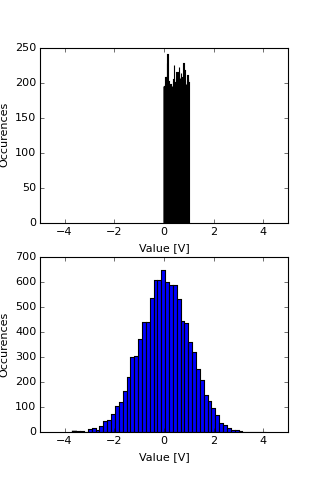

0.0188140759448 1.0007419531


In [43]:
import matplotlib.pyplot as plt
%matplotlib nbagg

x = np.random.rand(10000)
y = np.random.randn(10000)

fig=plt.figure(figsize=(4,6))
ax=fig.add_subplot(2,1,1)
ax.hist(x,50)

ax.set_xlabel('Value [V]')
ax.set_ylabel('Occurences')

ax.set_xlim([-5.,5.])

ax=fig.add_subplot(2,1,2)
ax.hist(y,50)
ax.set_xlabel('Value [V]')
ax.set_ylabel('Occurences')
ax.set_xlim([-5.,5.])

print np.mean(y),np.var(y)

** Data **

Some examples of loading data are given above.  

For text data, if you are lucky you can use `np.loadtxt`.  If you are less lucky, you can run `np.genfromtxt` for more complicated text files.  These will return numpy arrays.  

There are various ways to read binary data.  If the file is just a flat binary array of known byte size and byte order, then you can use `np.fromfile`.  For matlab files, there is another library in `scipy.io` that has a `loadmat` function. 


### Flow control

Python has all the flow-control you could want.  The most-used are `if`-`else` statements, and `for` loops, though `while` loops are occasionally used.

Conditional statements are made with `if` keywords.  Note the colon after the condition, and in particular note the indentation of the next line.  

In [50]:
a = 10
b = 2
c = 1
if (a>b):
    print "a is greater than b!"
elif (c>a):
    print "c is greater than a"
else:
    print "neither a is greater than b, nor c greater than a"



a is greater than b!


Python is *very* particular about indentation.  The following code snippets die because they are not properly indented:

In [53]:
a = 1
b = 2
c = 3
if a>b:
    print "a is greater than b!"
elif c>a:
    print "c is greater than a"
else:
    print "neither a is greater than b, nor c greater than a"


c is greater than a


In [54]:
a = 1
b = 2
c = 3
if a>b:
print "a is greater than b!"
elif c>a:
    print "c is greater than a"
else:
    print "neither a is greater than b, nor c greater than a"


IndentationError: expected an indented block (<ipython-input-54-0d8a26a7485f>, line 5)

So, a "block" of code is delimted by an indent, and the end of the code is the end of the indent.  We can of course have multiple lines in a block:

In [57]:
a=1
if a>b:
    print "a is greater than b!"
elif c>a:
    print "c is greater than a."
    print "its dull that c is always greater than a!"
    a = 20
    if a<c:
        print 'boo'
    else:
        print 'ha'
else:
    print "neither a is greater than b, nor c greater than a"
print 'a=%d'%a

c is greater than a.
its dull that c is always greater than a!
ha
a=20


The next important flow control is a `for`-loop.  Many progaming languages iterate a for-loop over a range of numbers, or over a variable that you can increase, and then stop the iteration when the variable passes a threshold.  In python you simply define a list (or an array) of objects to iterate over, and assign a variable to each element in the list one after the other:

In [59]:
b=0
for a in range(0,5):
    b= a+b
    print a,b
    print 'hi'

0 0
hi
1 1
hi
2 3
hi
3 6
hi
4 10
hi


Note that this is the same as typing:

In [68]:
b=0
a=0
b=a+b
print a,b
a=1
b=a+b
print a,b
a=2
b=a+b
print a,b
a=3
b=a+b
print a,b

0 0
1 1
2 3
3 6


The list in the for-loop can be a list of *anything* which can be very useful.  In this example, it is a list of function calls!

In [62]:
torun = [np.cos,np.tan,np.sin]
x = np.pi
for todo in torun:
    print todo
    y = todo(x)
    print x,y

<ufunc 'cos'>
3.14159265359 -1.0
<ufunc 'tan'>
3.14159265359 -1.22464679915e-16
<ufunc 'sin'>
3.14159265359 1.22464679915e-16


Very often we want ot iterate on a list, but we also want to have an index that increments.  We can do this the manual way, which is fine:

In [63]:
todo = ['A','B','C']
tofill = ['','','']
ind = 0
for a in todo:
    print(ind,a)
    tofill[ind]=a
    ind = ind+1
print tofill
    

(0, 'A')
(1, 'B')
(2, 'C')
['A', 'B', 'C']


But it is done *so* often that python has the `enumerate` function which is a lot more compact:

In [64]:
todo = ['A','B','C']
tofill = ['','','']
for ind,a in enumerate(todo):
    print(ind,a)
    tofill[ind]=a
print tofill

(0, 'A')
(1, 'B')
(2, 'C')
['A', 'B', 'C']


A more advanced construct that I don't do very often is to `zip` the lists.  Of course they need to be the same length.

In [78]:
todo = ['A','B','C']
otherlist = ['D','E','F']
for tf,a in zip(otherlist,todo):
    print tf,a


D A
E B
F C


### Functions

Of course python has the concept of functions. These take arguments and return results.  The routines above all use them.  If you want to define a function, it is relatively painless:

In [65]:
def HelloWorld(message,times=3):
    for ind in range(times):
        print message

# call the funtion...
HelloWorld('Hi there')
# call the funtion with optional argument
HelloWorld('Hello',times=2)
# call the function with no argument
HelloWorld()
# ooops, error...


Hi there
Hi there
Hi there
Hello
Hello


TypeError: HelloWorld() takes at least 1 argument (0 given)

So, as you can see, there are non-optional arguments, (`message` in this case) and optional ones with a keyword (`times`).  If the optional argument is not called, then the default value (in this case `3`) is used.  Of course, this is a terrible function in that it has no doc string:

In [81]:
def HelloWorld(message,times=3):
    """Prints the message a number of times"""
    for ind in range(times):
        print message

help(HelloWorld)

Help on function HelloWorld in module __main__:

HelloWorld(message, times=3)
    Prints the message a number of times



### Summary:

The `numpy` library is very extensive, and the main workhorse for this course.  Most of the data we input and deal with will be created using this library.  it is a big library, and there are lots of other things you will want to do.  Some will be covered in the exercises for this week.

## Plotting

Plotting is another big component of this course.  We saw some examples above.  Here we quickly point out some of what you need to know.

Plotting is via the library `matplotlib` [matplotlib.org](http://matplotlib.org).  It will allow you to make most of the plots we need for this course.  

** An x-y plot **

Figure(320x240)


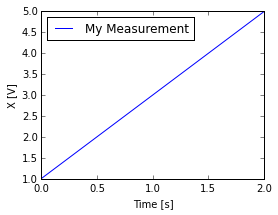

In [82]:
import matplotlib.pyplot as plt 
import numpy as np 

x= np.array([1.,2.,3.,4.,5.]) # volts
t = np.array([0.,0.5,1.,1.5,2.]) # seconds
fig=plt.figure(figsize=(4,3))
# figsize is the x,y dimensions in inches.
print fig
ax=fig.add_subplot(1,1,1) 
# add_subplot(m,n,ind) makes a grid of axes that has m rows and n columns
# ind indicates which of those axes to plot in.

ax.plot(t,x,label='My Measurement')
ax.set_xlabel('Time [s]')
ax.set_ylabel('X [V]')
ax.legend(loc=0)

** A Histogram **  Note also the use of `subplot` to make two plots in the same figure.

Also note the use of `tight_layout()` to adjust the spacing on the figure.  Note you can adjust the spacing by hand, but 90% of the time this is fine.  

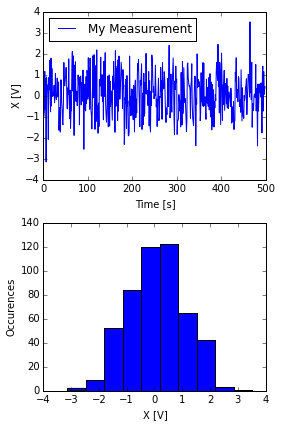

In [83]:
x= np.random.randn(500) # random number generator!

fig=plt.figure(figsize=(4,6))
ax=fig.add_subplot(2,1,1) 
# here there are 2x1 subplots being spaced.
ax.plot(x,label='My Measurement')
ax.set_xlabel('Time [s]')
ax.set_ylabel('X [V]')
ax.legend(loc=0)

ax=fig.add_subplot(2,1,2) 
ax.hist(x,label='My Measurement')
ax.set_xlabel('X [V]')
ax.set_ylabel('Occurences')

fig.tight_layout()

** Some error bars **  using `fill_between`

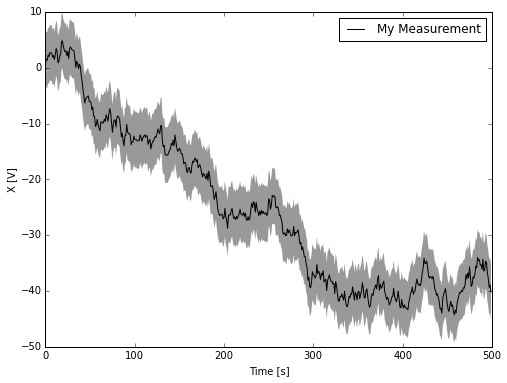

In [84]:
x= np.cumsum(np.random.randn(500)) # random number generator!
xup = x+5.
xdn = x-5.

t = np.arange(0.,500.,1.)

#fig=plt.figure(figsize=(8,6))
#ax=fig.add_subplot(1,1,1) 
fig,ax=plt.subplots(1,1,figsize=(8,6))
# this combines the two lines above into one line.
ax.fill_between(t,xdn,xup,alpha=0.4,edgecolor=None,linewidth=0,facecolor='k')
ax.plot(t,x,label='My Measurement',color='k')

ax.set_xlabel('Time [s]')
ax.set_ylabel('X [V]')
ax.legend(loc=0)


### Two-dimensional data plotting

** Two-d data**: Usually we use `contour` or `pcolormesh`:

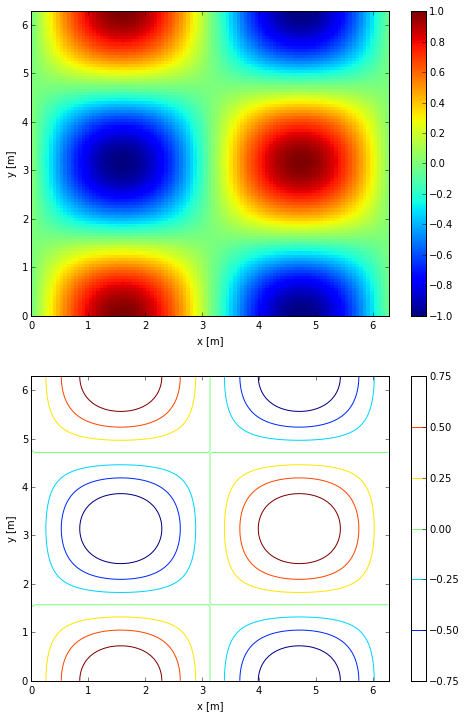

In [85]:
x = np.linspace(0.,2.*np.pi,100.)
y = np.linspace(0.,2.*np.pi,100.)
z = np.outer(np.cos(x),np.sin(y))

fig=plt.figure(figsize=(8,12))
ax=fig.add_subplot(2,1,1) 
#fig,axs=plt.subplots(2,1)

pcm=ax.pcolormesh(x,y,z)
fig.colorbar(pcm)

ax.set_xlabel('x [m]')
ax.set_ylabel('y [m]')
ax.autoscale(tight=True)

ax=fig.add_subplot(2,1,2) 
cnt=ax.contour(x,y,z)
fig.colorbar(cnt)
ax.set_xlabel('x [m]')
ax.set_ylabel('y [m]')


Of course you can combine them!, and of course the default colormap is terrible.  And that colorbar is a bit big.

**NOTE** `pcolormesh` is really slow to print if we use it's default mode.  It is often useful to specify `rasterized=True` as we do below.

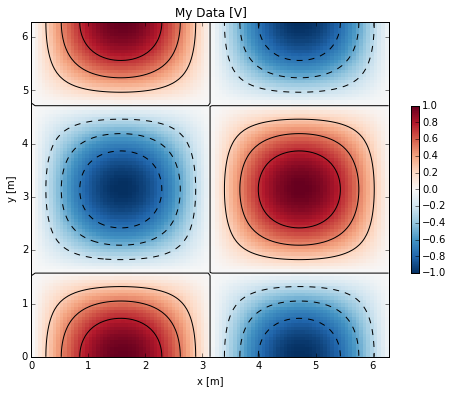

In [86]:
import matplotlib.cm as cm

fig,ax=plt.subplots(1,1,figsize=(8,6))

pcm=ax.pcolormesh(x,y,z,cmap=cm.RdBu_r,rasterized=True)
fig.colorbar(pcm,shrink=0.5)

cnt=ax.contour(x,y,z,colors='k')

ax.set_xlabel('x [m]')
ax.set_ylabel('y [m]')
ax.set_title('My Data [V]')
ax.autoscale(tight=True)


To see a list of the default colormaps you can have a look at [http://wiki.scipy.org/Cookbook/Matplotlib/Show_colormaps](http://wiki.scipy.org/Cookbook/Matplotlib/Show_colormaps)

Finally, if we want to export our nice plots beyond the notebook, we need to run `fig.savefig()`:

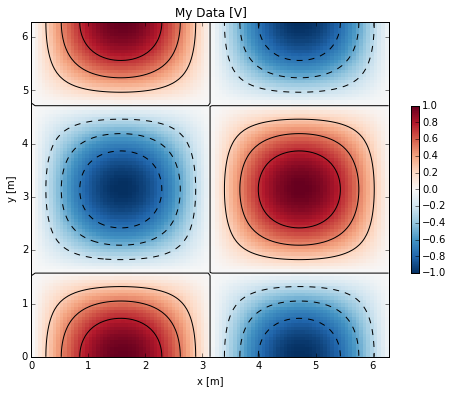

In [87]:
import matplotlib.cm as cm

fig,ax=plt.subplots(1,1,figsize=(8,6))

pcm=ax.pcolormesh(x,y,z,cmap=cm.RdBu_r,rasterized=True)
fig.colorbar(pcm,shrink=0.5)

cnt=ax.contour(x,y,z,colors='k')

ax.set_xlabel('x [m]')
ax.set_ylabel('y [m]')
ax.set_title('My Data [V]')
ax.autoscale(tight=True)
fig.savefig('MyPlot.png')

You can now use that file in a document (i.e. Word or LaTeX) You can also save as pdf, jpg, etc.  

And this is the result of loading that file:

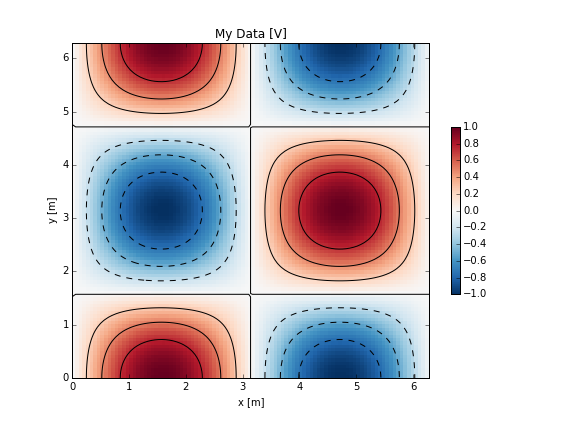

In [93]:
from IPython.display import Image
Image(filename='MyPlot.png')